ID : 각 레코드의 고유 번호

establishment_name : 시설 보고 데이터의 이름

ein : 연방 세금 식별 번호

company_name : 시설을 소유한 회사의 이름

street_address : 시설의 거리 주소

city : 시설이 위치한 도시

state : 시설이 위치한 주

zip_code : 시설의 전체 우편번호

naics_code : 북미 산업 분류 시스템(NAICS) 코드

industry_description : 산업 설명

size : 데이터를 제출하는 연도의 특정 시점에 근무한 최대 직원 수를 기반으로 한 시설의 규모

(시설에 직원이 20명 미만인 경우 1
// 시설에 20-249명의 직원이 있는 경우 2
// 시설에 250명 이상의 직원이 있는 경우 3)

establishment_type : 운용하는 곳이 공공/민간인지 여부

(시설이 정부 기관이 아닌 경우 1
// 시설이 주 정부 기관인 경우 2
// 시설이 지방 정부 기관인 경우 3)

year_filing_for : 시설에서 발생한 부상 및 질병이 보고된 역년

annual_average_employees : 연평균 직원 수

total_hours_worked : 모든 직원이 근무한 총 시간

no_injuries_illnesses(target) : 해당 시설에 해당 연도 동안 OSHA에 기록 가능한 작업 관련 부상 또는 질병이 있었는지 여부 -> Target

(시설에 부상 또는 질병이 있는 경우 1
// 시설에 부상 또는 질병이 없는 경우 2)

total_deaths : 총 사망자 수

total_dafw_cases : 결근 일수가 있는 총 사례 수

total_djtr_cases : 전직 또는 제한이 있는 총 사례 수

total_other_cases : 기록 가능한 기타 총 건수

total_dafw_days : 총 결근 일수

total_djtr_days : 전직 또는 제한의 총 일수

total_injuries : 총 부상자 수

total_skin_disorders : 총 피부 질환 수

total_respiratory_conditions: 총 호흡 상태 수

total_poisonings : 총 중독 횟수

total_hearing_loss : 총 난청 수

total_other_illnesses : 기타 모든 질병의 총 수

establishment_ID : 개별 사용자 계정으로 생성된 각 시설의 고유 번호

created_timestamp : 기록이 ITA에 제출된 날짜 및 시간

Change_reason : 해당되는 경우 시설의 부상 및 질병 요약이 변경된 이유

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip3 install imbalanced-learn
!pip install category_encoders
!pip3 install xgboost==1.7.2
!pip install scikit-learn==1.0 -U
!pip install eli5
!pip install pdpbox

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [3]:
# 미국의 2016 ~ 2021년까지의 산업 재해 데이터셋을 불러옴
# 데이터셋의 컬럼은 위의 항목에 서술해두었음
# 데이터셋을 불러와 모두 병합하는 과정을 거침

import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/ITA Data CY 2016.csv', encoding='cp1252', engine = 'python')
df2 = pd.read_csv('/content/ITA Data CY 2017.csv', encoding='cp1252', engine = 'python')
df3 = pd.read_csv('/content/ITA Data CY 2018.csv', encoding='cp1252', engine = 'python')
df4 = pd.read_csv('/content/ITA Data CY 2019.csv', engine = 'python')
df5 = pd.read_csv('/content/ITA Data CY 2020.csv', engine = 'python')
df6 = pd.read_csv('/content/ITA Data CY 2021 submitted thru 3-14-2022 v3.csv', engine = 'python')

df_list = [df1, df2, df3, df4, df5, df6]
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head()

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,delete
0,4.0,"McKamish, Inc.","McKamish, Inc.",NaN,50 55th Street,Pittsburgh,PA,15201.0,238220.0,"Heating, ventilation and air-conditioning (HVA...",...,0.0,0.0,0.0,41920.0,1.0,3.0,2016.0,8/1/2017 6:12:00,NaN,NaN
1,5.0,"The Talaria Company, LLC",The Hinckley Company,NaN,40 Industrial Way,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,41922.0,1.0,3.0,2016.0,8/1/2017 6:23:00,NaN,NaN
2,6.0,Williamsburg Manufacturing,Williamsburg Manufacturing,NaN,408 Maplewood Ave,Williamsburg,IA,52361.0,336370.0,Motor vehicle metal parts stamping,...,0.0,0.0,0.0,41923.0,1.0,3.0,2016.0,8/1/2017 6:27:00,NaN,NaN
3,7.0,"The Talaria Company, LLC","Morris Yachts, LLC",NaN,27 Ramp Road,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,41925.0,1.0,2.0,2016.0,8/1/2017 6:36:00,Hit wrong hyperlink,NaN
4,8.0,"The Talaria Company, LLC","Hunt Yachts, LLC",NaN,1909 Alden Landing,Portsmouth,RI,2871.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,41926.0,1.0,2.0,2016.0,8/1/2017 6:35:00,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635164 entries, 0 to 1635163
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1635164 non-null  float64
 1   company_name                  1496235 non-null  object 
 2   establishment_name            1635153 non-null  object 
 3   ein                           760310 non-null   float64
 4   street_address                1635140 non-null  object 
 5   city                          1635132 non-null  object 
 6   state                         1635164 non-null  object 
 7   zip_code                      1635163 non-null  float64
 8   naics_code                    1635164 non-null  float64
 9   industry_description          1517833 non-null  object 
 10  annual_average_employees      1635164 non-null  float64
 11  total_hours_worked            1635152 non-null  float64
 12  no_injuries_illnesses       

In [6]:
df.describe()

,id,ein,zip_code,naics_code,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,...,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,size,year_filing_for,delete
count,1.635164e+06,7.603100e+05,1.635163e+06,1.635164e+06,1.635164e+06,1.635152e+06,1.635162e+06,1.635164e+06,1.635164e+06,1.635164e+06,...,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,1.635164e+06,287028.0
mean,8.441433e+05,4.938786e+08,2.749482e+07,4.583947e+05,2.479458e+03,1.071383e+07,1.354422e+00,3.344619e-03,1.688101e+00,1.354706e+00,...,4.220588e+00,2.069517e-03,2.336665e-01,2.930287e-02,3.718220e-02,2.460071e-01,3.631200e+05,1.958710e+00,2.018641e+03,0.0
std,4.984976e+05,2.515062e+08,1.330713e+08,1.592250e+05,1.374762e+06,1.316291e+10,4.783381e-01,6.643379e-02,8.742218e+00,7.386362e+00,...,1.704037e+01,7.868952e-02,4.351051e+00,4.219511e-01,6.185818e-01,3.748910e+00,2.230082e+05,5.194341e-01,1.657903e+00,0.0
min,4.000000e+00,4.533000e+03,0.000000e+00,1.111000e+05,0.000000e+00,-4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,1.000000e+00,2.016000e+03,0.0
25%,4.096868e+05,3.110201e+08,2.973000e+04,3.328120e+05,2.300000e+01,3.582800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.752948e+05,2.000000e+00,2.017000e+03,0.0
50%,8.434905e+05,4.604376e+08,5.257700e+04,4.451100e+05,4.800000e+01,8.142600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.297290e+05,2.000000e+00,2.019000e+03,0.0
75%,1.262593e+06,7.107944e+08,8.000300e+04,5.613200e+05,1.150000e+02,1.976250e+05,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.173692e+05,2.000000e+00,2.020000e+03,0.0
max,1.724286e+06,1.000000e+09,9.993000e+08,9.999990e+05,1.331667e+09,1.683162e+13,2.000000e+00,1.200000e+01,1.728000e+03,2.277000e+03,...,4.563000e+03,3.100000e+01,1.467000e+03,1.260000e+02,1.990000e+02,1.067000e+03,8.936620e+05,3.000000e+00,2.021000e+03,0.0


In [7]:
# 데이터셋의 총 중복치와 결측치, 총 데이터 개수와 컬럼별 unique한 값, 데이터타입을 한 번에 파악하기 위하여 해당 함수를 정의하여 사용

def analysis_on_features(df):

    results = pd.DataFrame()
    results["Null_count"] = None
    results["Num_unique_values"] = None
    results["Data_type"] = None
    duplicated_rows = None
    shape_data = None

    results['Null_count'] = df.isnull().sum()
    results['Num_unique_values'] = df.nunique()
    results["Data_type"] = df.dtypes
    duplicated_rows = df.duplicated().sum()
    shape_data = df.shape[0]
    return results, duplicated_rows, shape_data

df_results, df_duplicated_rows, df_shape_data = analysis_on_features(df)

print("데이터셋의 중복치의 수 : ", df_duplicated_rows)
print("데이터셋의 데이터의 수 : ", df_shape_data)
print('\n')
df_results

데이터셋의 중복치의 수 :  0
데이터셋의 데이터의 수 :  1635164




,Null_count,Num_unique_values,Data_type
id,0,1635164,float64
company_name,138929,213813,object
establishment_name,11,662433,object
ein,874854,125109,float64
street_address,24,619889,object
city,32,42144,object
state,0,98,object
zip_code,1,68411,float64
naics_code,0,1733,float64
industry_description,117331,36951,object


In [8]:
# 무의미한 컬럼, 사용하지 않는 컬럼은 특성 공학 전임에도 미리 삭제해주기로 함
# 해당 과정을 거친 후 데이터 전처리와 특성 엔지니어링 과정 진행

df = df.drop(['id', 'zip_code', 'ein', 'industry_description', 'street_address', 'change_reason', 'delete', 'establishment_id', 'created_timestamp'], axis = 1 )
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628657 entries, 0 to 1635163
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   company_name                  1489978 non-null  object 
 1   establishment_name            1628646 non-null  object 
 2   city                          1628625 non-null  object 
 3   state                         1628657 non-null  object 
 4   naics_code                    1628657 non-null  float64
 5   annual_average_employees      1628657 non-null  float64
 6   total_hours_worked            1628645 non-null  float64
 7   no_injuries_illnesses         1628655 non-null  float64
 8   total_deaths                  1628657 non-null  float64
 9   total_dafw_cases              1628657 non-null  float64
 10  total_djtr_cases              1628657 non-null  float64
 11  total_other_cases             1628657 non-null  float64
 12  total_dafw_days             

In [10]:
# 컬럼을 제거하고 결측치 값과 unique 값 등을 확인

print("데이터셋의 중복치의 수 : ", df_duplicated_rows)
print("데이터셋의 데이터의 수 : ", df_shape_data)
print('\n')
df_results

데이터셋의 중복치의 수 :  0
데이터셋의 데이터의 수 :  1635164




,Null_count,Num_unique_values,Data_type
id,0,1635164,float64
company_name,138929,213813,object
establishment_name,11,662433,object
ein,874854,125109,float64
street_address,24,619889,object
city,32,42144,object
state,0,98,object
zip_code,1,68411,float64
naics_code,0,1733,float64
industry_description,117331,36951,object


In [11]:
# 노동자의 질병과 결근, 이직 발생등의 총 개수를 파악

illval = df.groupby(['no_injuries_illnesses'])['total_deaths','total_dafw_cases','total_djtr_cases','total_other_cases','total_dafw_days','total_djtr_days','total_injuries','total_poisonings','total_respiratory_conditions','total_skin_disorders','total_hearing_loss','total_other_illnesses'].sum()
illval = pd.DataFrame(illval)
illval['Total'] = illval['total_deaths'] + illval['total_dafw_cases'] + illval['total_djtr_cases'] + illval['total_other_cases'] + illval['total_dafw_days'] + illval['total_djtr_days'] + illval['total_injuries'] + illval['total_poisonings'] + illval['total_respiratory_conditions'] + illval['total_skin_disorders'] + illval['total_hearing_loss'] + illval['total_other_illnesses']
illval = illval.reset_index(drop=False)
illval['no_injuries_illnesses'] = illval['no_injuries_illnesses'].astype('str')

illval

,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,Total
0,1.0,5459.0,2756970.0,2212849.0,2812887.0,95673489.0,129417313.0,6892978.0,3371.0,381533.0,47840.0,60740.0,401704.0,240667133.0
1,2.0,0.0,140.0,90.0,167.0,4767.0,3593.0,374.0,0.0,3.0,2.0,8.0,10.0,9154.0


In [12]:
# 특성 엔지니어링 진행

def feature_engineering(df):

    # 컬럼명을 전반적으로 알아보기 쉽게 모두 변경 (앞에서 삭제한 컬럼을 제외)

    df = df.rename(columns={'company_name':'회사이름', 'establishment_name':'시설이름', 'establishment_name':'시설이름', 'city':'도시',
                            'state':'주', 'naics_code':'북미산업코드', 'annual_average_employees':'연평균직원수', 'total_hours_worked':'연간총근로시간', 
                            'no_injuries_illnesses':'산재발생여부', 'establishment_type':'운영기관', 'size':'기업규모', 'year_filing_for':'Year',
                            'total_deaths':'총사망자', 'total_dafw_cases':'결근발생사례건수', 'total_djtr_cases':'이직과제한발생사례건수', 'total_other_cases':'기타근로불가발생사례건수',
                            'total_injuries':'총부상자', 'total_skin_disorders':'총피부병질환자', 'total_respiratory_conditions':'총호흡기질환자', 'total_poisonings':'총감염성질환자', 
                            'total_hearing_loss':'총난청질환자', 'total_other_illnesses':'기타질병질환자'})

    # 타겟값(산재발생여부)이 결측치일 경우 모델링 불가능, 삭제하기로 함
    null_tar = df[(df['산재발생여부'].isnull())]
    df = df.drop(index = null_tar.index).reset_index(drop=True)

    # 직원 수와 총 직원 근로시간이 0인 경우 정상적인 데이터가 아니라고 간주, 분석이 불가능하므로 해당 행은 삭제
    error_employees = df[(df['연평균직원수'] == 0)]
    df = df.drop(index = error_employees.index).reset_index(drop=True)
    error_hours = df[(df['연간총근로시간'] == 0)]
    df = df.drop(index = error_hours.index).reset_index(drop=True)

    # 운영기관이 결측치일 경우 정확한 가설 분석이 불가능함으로 삭제 (취소)
    # null_est = df[(df['운영기관'].isnull())]
    # df = df.drop(index = null_est.index).reset_index(drop=True)

    # 운영기관이 결측치일 경우 지방 정부 및 정부 기관이 아니라고 간주, 최빈값인 1.0으로 교체
    df['운영기관'] = df['운영기관'].fillna(1.0)

    # 북미산업코드의 앞 두자리를 이용하여, 북미 산업 분류 시스템(NAICS) 코드에 해당하는 값들만 출력하여, 범주의 값을 파악하기 쉽게 변경한 뒤, 새로운 컬럼(산업)을 만듬

    df['북미산업코드'] = df['북미산업코드'].astype('str')
    df['산업코드'] = df['북미산업코드'].str[:2]
    naics = ['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']
    df = df[df['산업코드'].isin(naics)]
    df['산업코드'] = df['산업코드'].astype('object')      
    name_mapping = {'11': 'AFFH', '21': 'MQOG', 
                    '22': 'UT', '23': 'CS', '31': 'MF', '32': 'MF','33': 'MF','42': 'WT',
                    '44': 'RT', '45': 'RT', '48': 'TW', '49': 'TW', 
                    '51': 'IF', '52': 'FI', '53': 'RE, RL','54': 'PST',
                    '55': 'MCE', '56': 'ASWMRS',
                    '61': 'ES', '62': 'HCSA', '71': 'AER', '72': 'AFS', 
                    '81': 'OS(NOT PA)', '92': 'PA'}
    func = lambda x: name_mapping.get(x, x)
    df['Industry'] = df.산업코드.map(func)

    # 타겟값은 산재가 발생 했을 경우 1 , 그렇지 않을 경우 0 으로 변경

    df['산재발생여부'] = np.where(df['산재발생여부'] == 1.0, 1, 0) 

    # 이름/주소와 관련된 컬럼의 결측치를 모두 Unknown으로 대체 (필수적인 사항은 아니나, 진행하기로 함)

    df['회사이름'] = df['회사이름'].fillna('Unknown')
    df['시설이름'] = df['시설이름'].fillna('Unknown')
    df['도시'] = df['도시'].fillna('Unknown')

    # 주의 값을 대문자로 통일시킴
    df['주'] = df['주'].str.upper()

    # 분류 모델을 구현하기 적합하게 적합한 데이터 타입으로 변경

    df = df.replace({'운영기관' : 'Executive and Legislative Offices'}, 3)  
    df['Year'] = df['Year'].astype('int')
    df['Year'] = df['Year'].astype('object')

    # total_hours_worked의 결측치 행 (12개)를 삭제

    Null_hours = df[(df['연간총근로시간'].isnull())]
    df = df.drop(index=Null_hours.index).reset_index(drop=True)

    # 총 직원의 근로시간(total_hours_worked)과 연평균 직원(annual_average_employees)을 통해 직원별 평균 근무시간 컬럼을 생성

    df["직원근로시간"] = round((df["연간총근로시간"] / df["연평균직원수"]), 0)

    # 이상치 제거 (이상치 : 직원별 평균 근무시간이 4000시간을 넘는 것 (1% 미만))

    outlier = df.loc[df['직원근로시간'] > 4000, '직원근로시간'].index
    df = df.drop(labels=outlier, axis=0).reset_index(drop=True)

    # 직원별 평균 근무시간을 구간으로 나누어준 새로운 컬럼 생성

    df['Employee working hours'] = 0
    df['Employee working hours'] = pd.cut(df.직원근로시간, bins=[0, 1000, 1200, 1400, 1600, 1800, 2000, 2400, 4000], labels=['1 ~ 1000 hr', '1000 ~ 1200 hr', '1200 ~ 1400 hr', '1400~ 1600 hr', '1600 ~ 1800 hr', '1800 ~ 2000 hr', '2000 ~ 2400 hr', '2400 hr ~'])

    # 이상치 제거 (이상치 : 연평균 직원수가 2000명을 초과하는 데이터 (1% 미만))

    outlier1 = df.loc[df['연평균직원수'] > 2000, '연평균직원수'].index
    df = df.drop(labels=outlier1, axis=0).reset_index(drop=True)

    # 직원별 평균 근무시간을 구간으로 나누어준 새로운 컬럼 생성

    df['Average employees'] = 0
    df['Average employees'] = pd.cut(df.연평균직원수, bins=[0 ,10, 25, 50, 150, 2000], labels=['1 ~ 10 employees', '10 ~ 25 employees', '25 ~ 50 employees', '50 ~ 150 employees', '150 employees ~ '])

    # human_hours_lab이 결측치일 경우 해당 행을 삭제

    null_hhl = df[(df['Employee working hours'].isnull())]
    df = df.drop(index = null_hhl.index).reset_index(drop=True)

    # 기업규모와 운영기관의 데이터값을 파악하기 쉽게 바꾸어 줌

    df['기업규모'] = df['기업규모'].astype('int')
    size = [1, 2, 3]
    df = df[df['기업규모'].isin(size)]     
    name_mapping = {1: '20 employees under', 2: '20 ~ 249 employees', 3: '250 employees more'}
    func = lambda x: name_mapping.get(x, x)
    df['Company size'] = df.기업규모.map(func)
    df['Company size'] = df['Company size'].astype('object')

    df['운영기관'] = df['운영기관'].astype('int')
    ins = [1, 2, 3]
    df = df[df['운영기관'].isin(ins)]      
    name_mapping = {1: 'Not a government entity', 2: 'State Government entity', 3: 'Local Government entity'}
    func = lambda x: name_mapping.get(x, x)
    df['Institution'] = df.운영기관.map(func)
    df['Iperating institution'] = df['Institution'].astype('object')

    # 총사망자, 결근발생사례건수, 이직과제한발생사례건수, 기타근로불가발생사례건수, 총부상자, 총피부병질환자, 총호흡기질환자, 총감염성질환자, 총난청질환자, 기타질병질환자가 발생하였을 시 1, 아닐시 0을 부여하는 새로운 컬럼들 생성 (object 타입으로 부여)

    df["사망자발생여부"] = np.where(df["총사망자"].values > 0.0 , "1", "0" )
    df['사망자발생여부'] = df['사망자발생여부'].astype('object')
    df["결근발생여부"] = np.where(df["결근발생사례건수"].values > 0.0 , "1", "0" )
    df['결근발생여부'] = df['결근발생여부'].astype('object')
    df["이직과제한발생여부"] = np.where(df["이직과제한발생사례건수"].values > 0.0 , "1", "0" )
    df['이직과제한발생여부'] = df['이직과제한발생여부'].astype('object')
    df["기타근로불가발생여부"] = np.where(df["기타근로불가발생사례건수"].values > 0.0 , "1", "0" )
    df['기타근로불가발생여부'] = df['기타근로불가발생여부'].astype('object')
    df["부상자발생여부"] = np.where(df["총부상자"].values > 0.0 , "1", "0" )
    df['부상자발생여부'] = df['부상자발생여부'].astype('object')
    df["피부병질환발생여부"] = np.where(df["총피부병질환자"].values > 0.0 , "1", "0" )
    df['피부병질환발생여부'] = df['피부병질환발생여부'].astype('object')
    df["호흡기질환자발생여부"] = np.where(df["총호흡기질환자"].values > 0.0 , "1", "0" )
    df['호흡기질환자발생여부'] = df['호흡기질환자발생여부'].astype('object')
    df["감염성질환자발생여부"] = np.where(df["총감염성질환자"].values > 0.0 , "1", "0" )
    df['감염성질환자발생여부'] = df['감염성질환자발생여부'].astype('object')
    df["난청질환자발생여부"] = np.where(df["총난청질환자"].values > 0.0 , "1", "0" )
    df['난청질환자발생여부'] = df['난청질환자발생여부'].astype('object')
    df["기타질병질환자발생여부"] = np.where(df["기타질병질환자"].values > 0.0 , "1", "0" )
    df['기타질병질환자발생여부'] = df['기타질병질환자발생여부'].astype('object')


    # 더 이상 사용하지 않는 naics_code, naice 및 결근 일수, 이직/제한일수, 총사망자, 총부상자 컬럼 밑 발생사례건수를 포함한 컬럼 제거

    df = df.drop(['북미산업코드', '산업코드', 'total_dafw_days', 'total_djtr_days', '총사망자', '결근발생사례건수', '이직과제한발생사례건수', '기타근로불가발생사례건수', '총부상자', '총피부병질환자', '총호흡기질환자', 
                  '총감염성질환자', '총난청질환자', '기타질병질환자'], axis = 1 )

    # 특성 공학 진행 중 발생할 수 있는 중복치를 제거하고, 인덱스를 정리함

    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    return df

In [13]:
df_clean = feature_engineering(df)

In [14]:
df_clean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594103 entries, 0 to 1594102
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   회사이름                    1594103 non-null  object  
 1   시설이름                    1594103 non-null  object  
 2   도시                      1594103 non-null  object  
 3   주                       1594103 non-null  object  
 4   연평균직원수                  1594103 non-null  float64 
 5   연간총근로시간                 1594103 non-null  float64 
 6   산재발생여부                  1594103 non-null  int64   
 7   운영기관                    1594103 non-null  int64   
 8   기업규모                    1594103 non-null  int64   
 9   Year                    1594103 non-null  object  
 10  Industry                1594103 non-null  object  
 11  직원근로시간                  1594103 non-null  float64 
 12  Employee working hours  1594103 non-null  category
 13  Average employees       1594103 non-null  

In [15]:
df_clean.head()

,회사이름,시설이름,도시,주,연평균직원수,연간총근로시간,산재발생여부,운영기관,기업규모,Year,...,사망자발생여부,결근발생여부,이직과제한발생여부,기타근로불가발생여부,부상자발생여부,피부병질환발생여부,호흡기질환자발생여부,감염성질환자발생여부,난청질환자발생여부,기타질병질환자발생여부
0,"McKamish, Inc.","McKamish, Inc.",Pittsburgh,PA,280.0,579688.0,1,1,3,2016,...,0,1,1,1,1,0,0,0,0,0
1,"The Talaria Company, LLC",The Hinckley Company,Trenton,ME,246.0,501578.0,1,1,3,2016,...,0,1,1,1,1,0,0,0,0,0
2,Williamsburg Manufacturing,Williamsburg Manufacturing,Williamsburg,IA,273.0,619945.0,1,1,3,2016,...,0,1,1,0,1,0,0,0,0,0
3,"The Talaria Company, LLC","Morris Yachts, LLC",Trenton,ME,33.0,75794.0,1,1,2,2016,...,0,0,1,0,1,0,0,0,0,0
4,"The Talaria Company, LLC","Hunt Yachts, LLC",Portsmouth,RI,43.0,114734.0,1,1,2,2016,...,0,1,0,1,1,0,0,0,0,0


In [16]:
df_clean_results, df_clean_duplicated_rows, df_clean_shape_data = analysis_on_features(df_clean)

print("데이터셋의 중복치의 수 : ", df_clean_duplicated_rows)
print("데이터셋의 데이터의 수 : ", df_clean_shape_data)
print('\n')
df_clean_results

데이터셋의 중복치의 수 :  0
데이터셋의 데이터의 수 :  1594103




,Null_count,Num_unique_values,Data_type
회사이름,0,210174,object
시설이름,0,649733,object
도시,0,41818,object
주,0,62,object
연평균직원수,0,2000,float64
연간총근로시간,0,456492,float64
산재발생여부,0,2,int64
운영기관,0,3,int64
기업규모,0,3,int64
Year,0,6,object


In [37]:
# 가설 1 : 직원 수에 따라 산업 재해 발생 확률이 다를 것이다.
# 가설 2 : 산업 종류에 따라 산업 재해 발생 확률이 다를 것이다.
# 가설 3 : 공공기관/민간기업 운영 여부에 따라 산업 재해 발생 확률이 다를 것이다.
# 가설 4 : 년도에 따라 산업 재해 발생 확률이 다를 것이다.
# 가설 5 : 연 근로 시간에 따라 산업 재해 발생 확률이 다를 것이다.

In [38]:
# 타겟의 비율을 우선 확인하기 위해 타겟값 설정
# 시각화를 위해 pyplot, seaborn을 import

import matplotlib.pyplot as plt
import seaborn as sns

target = '산재발생여부'

In [39]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df[target], normalize = 'index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

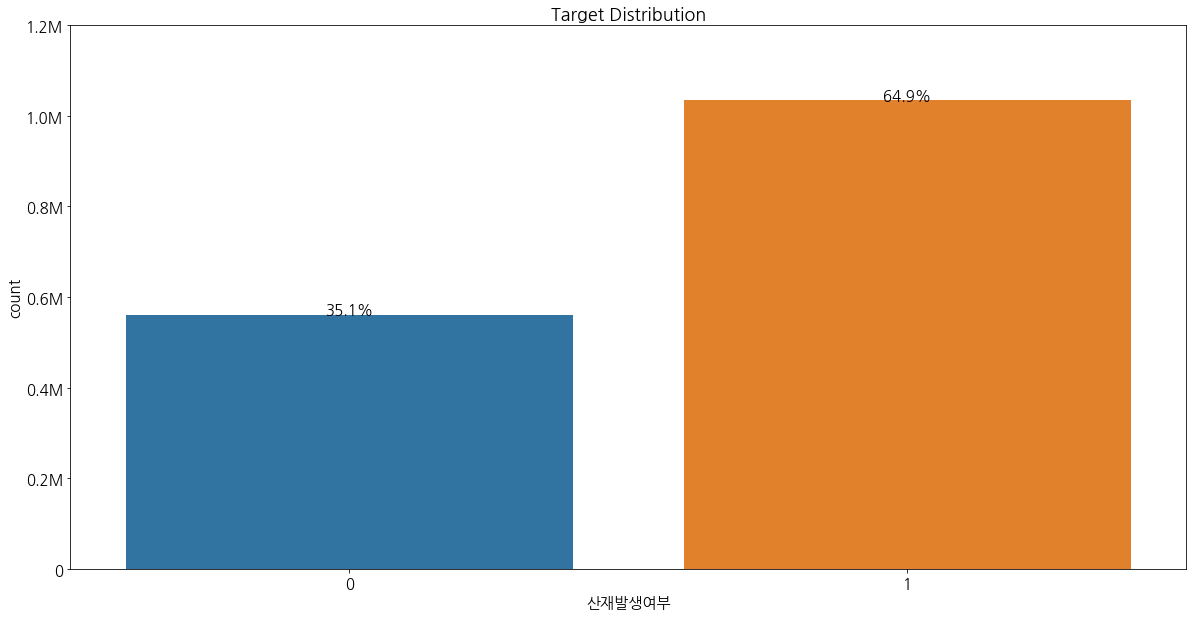

In [40]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()     
        width = patch.get_width()       
        left_coord = patch.get_x()      
        percent = height/total_size*100
        plt.rc('font', size = 15, family=font_name) 

        ax.text(x = left_coord + width/2.0,    
                y = height + total_size*0.001, 
                s = f'{percent:1.1f}%',        
                ha = 'center')                 

plt.figure(figsize=(20, 10))

ax = sns.countplot(x = target, data = df_clean)
write_percent(ax, len(df_clean)) 
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000],('0', '0.2M', '0.4M', '0.6M', '0.8M', '1.0M', '1.2M'))
ax.set_title('Target Distribution');

In [41]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() 

    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab,
                        order = crosstab[feature].values, 
                        color = 'black',                  
                        legend = True)                   
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) 
    ax2.set_ylabel('Target 1 Ratio(%)')

In [42]:
import matplotlib.gridspec as gridspec

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(20, 20)):
    plt.figure(figsize=size)
    plt.rc('font', size = 15, family = font_name)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)

        g = sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      palette='hsv',
                      ax=ax)
        g.set_xticklabels(g.get_xticklabels(), rotation = 60)

        write_percent(ax, len(df)) 

        plot_pointplot(ax, feature, crosstab) 

        ax.set_title(f'{feature} 분포')

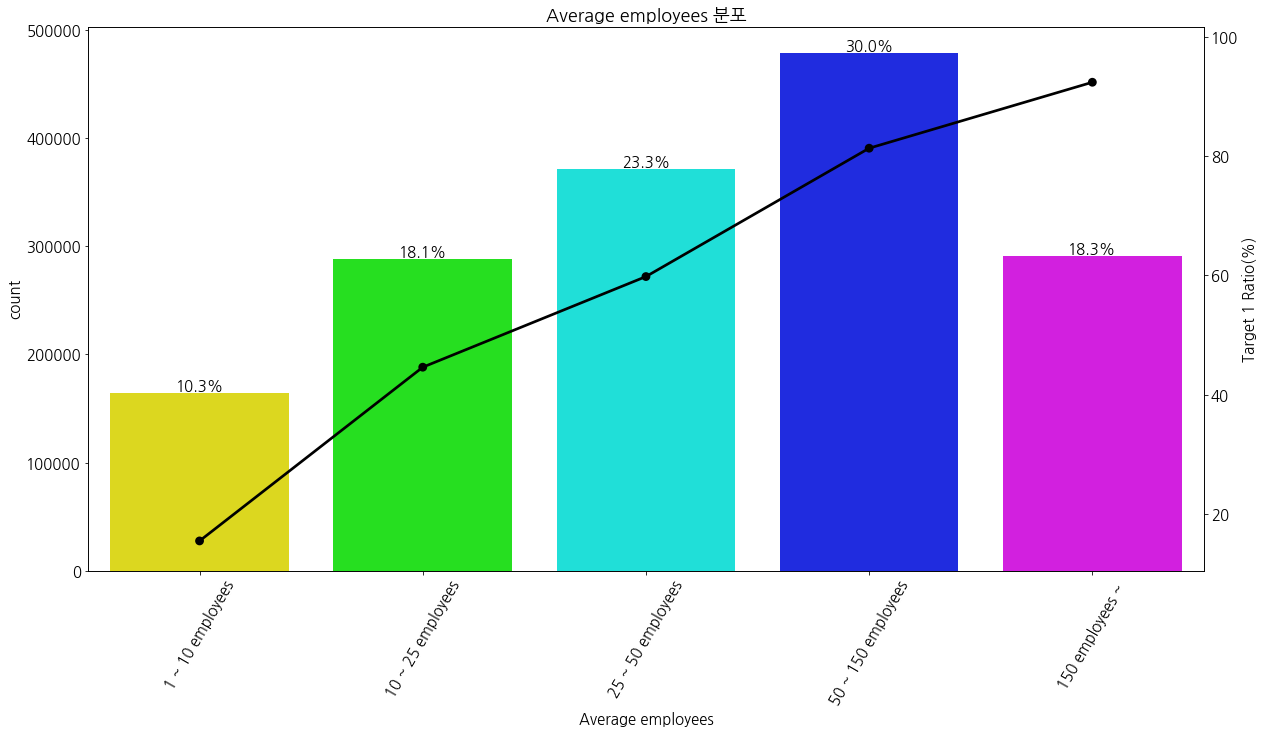

In [43]:
plot_cat_dist_with_true_ratio(df_clean, ['Average employees'], 
                              num_rows=1, num_cols=1, size=(20, 10))

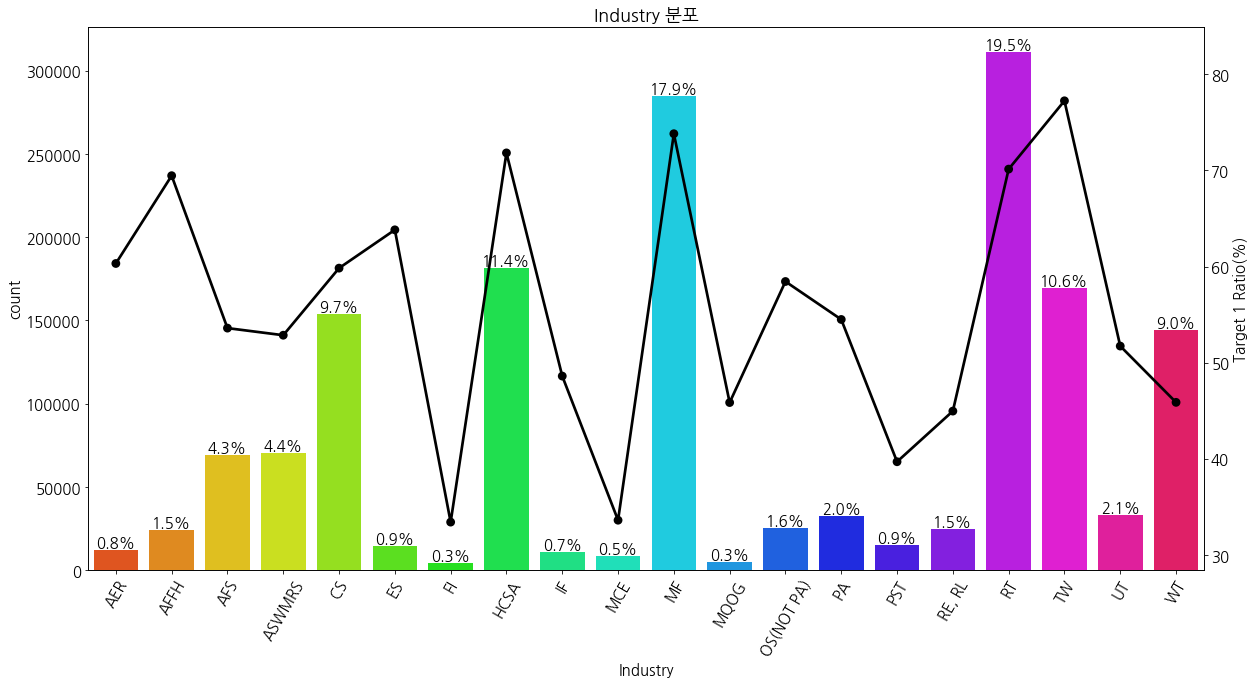

In [44]:
plot_cat_dist_with_true_ratio(df_clean, ['Industry'], 
                              num_rows=1, num_cols=1, size=(20, 10))

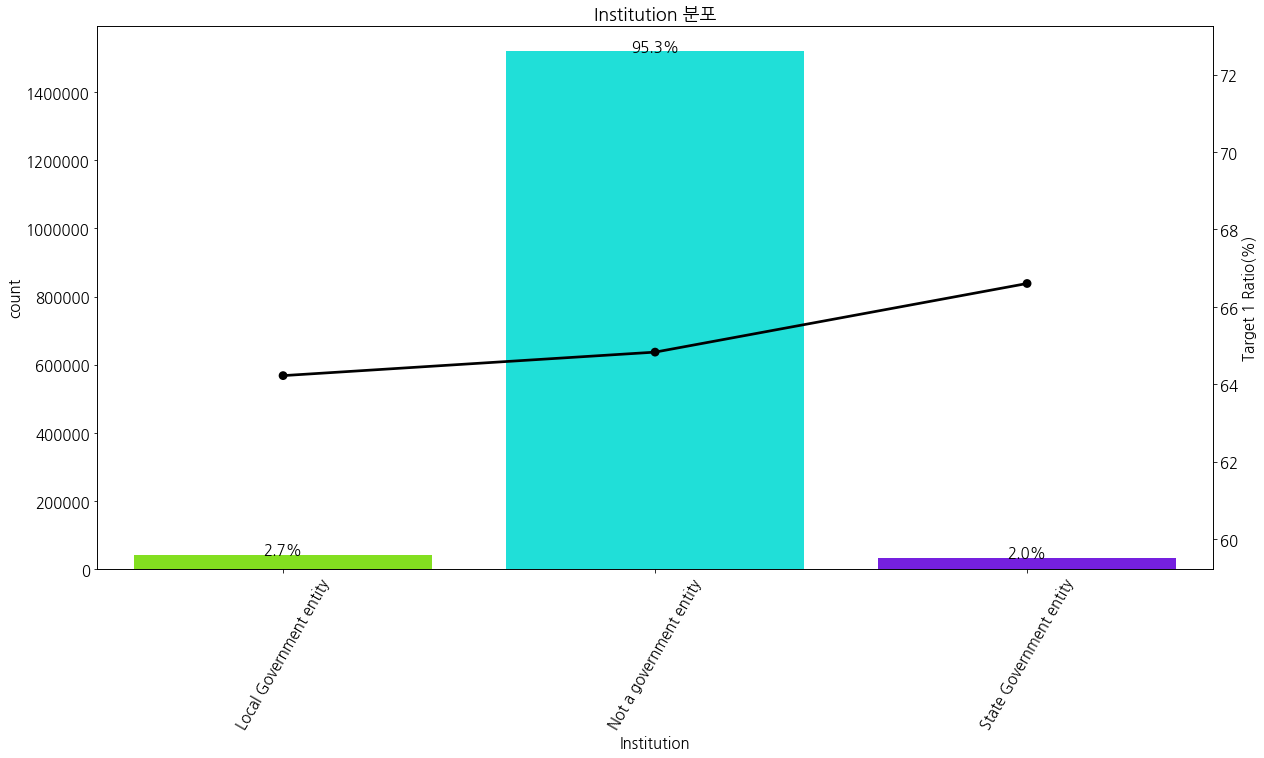

In [45]:
plot_cat_dist_with_true_ratio(df_clean, ['Institution'], 
                              num_rows=1, num_cols=1, size=(20, 10))

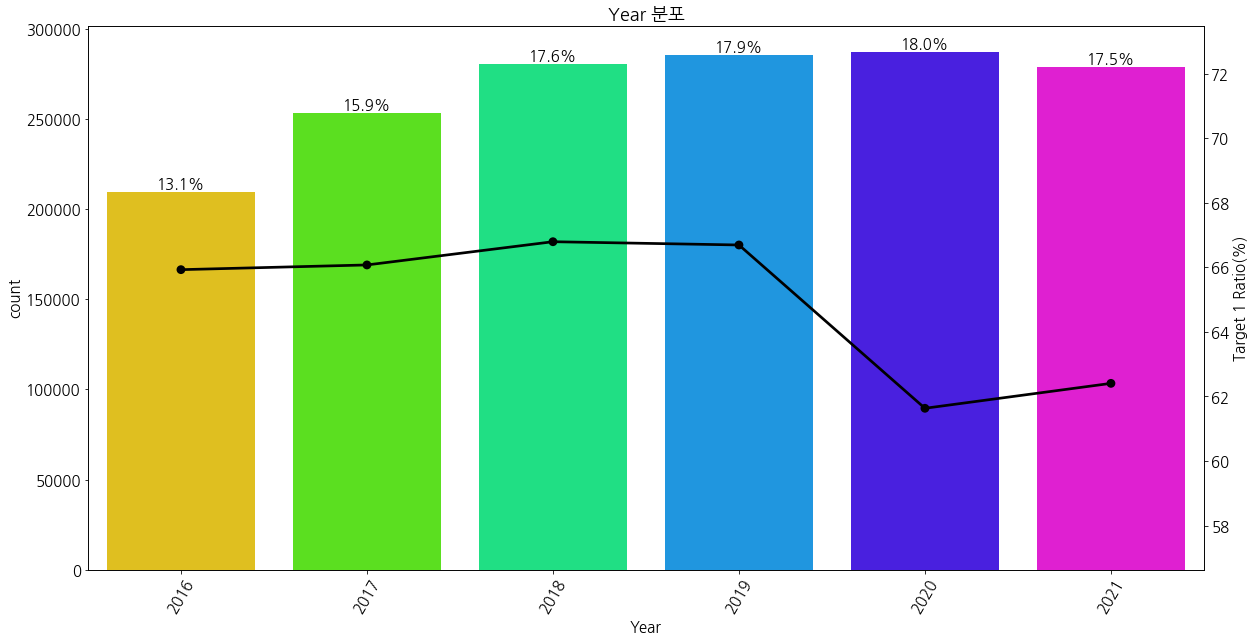

In [46]:
plot_cat_dist_with_true_ratio(df_clean, ['Year'], 
                              num_rows=1, num_cols=1, size=(20, 10))

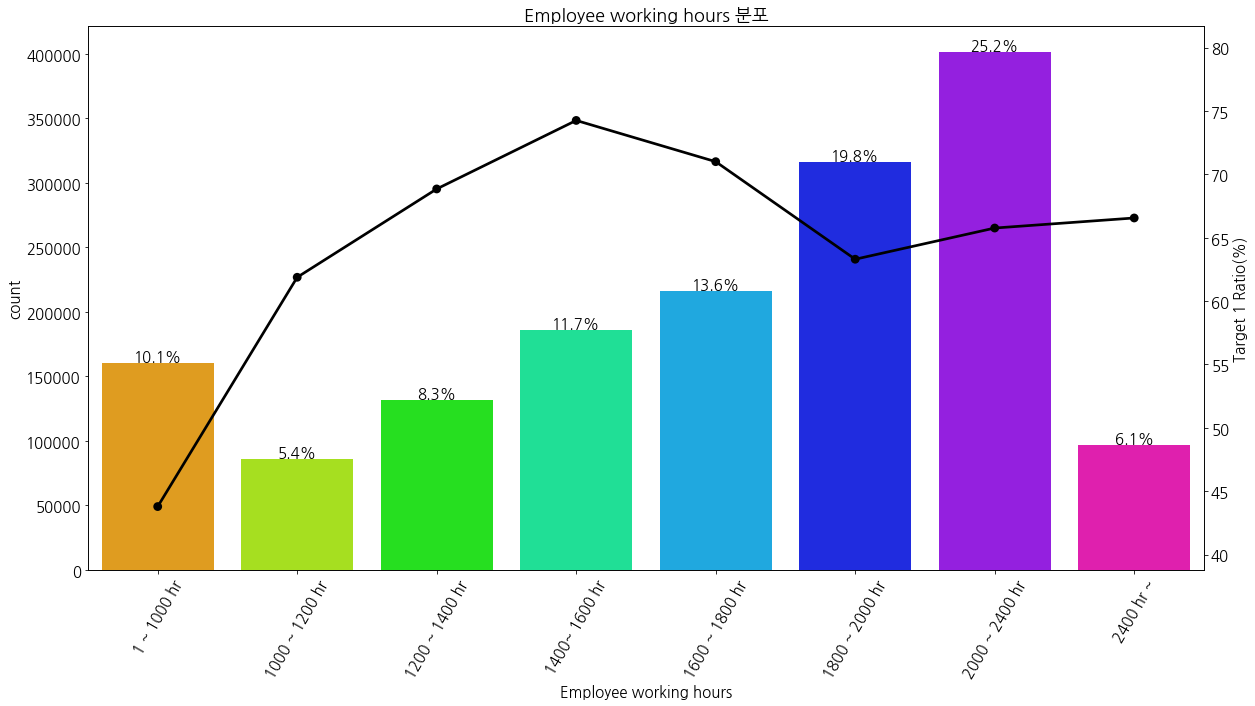

In [47]:
plot_cat_dist_with_true_ratio(df_clean, ['Employee working hours'], 
                              num_rows=1, num_cols=1, size=(20, 10))

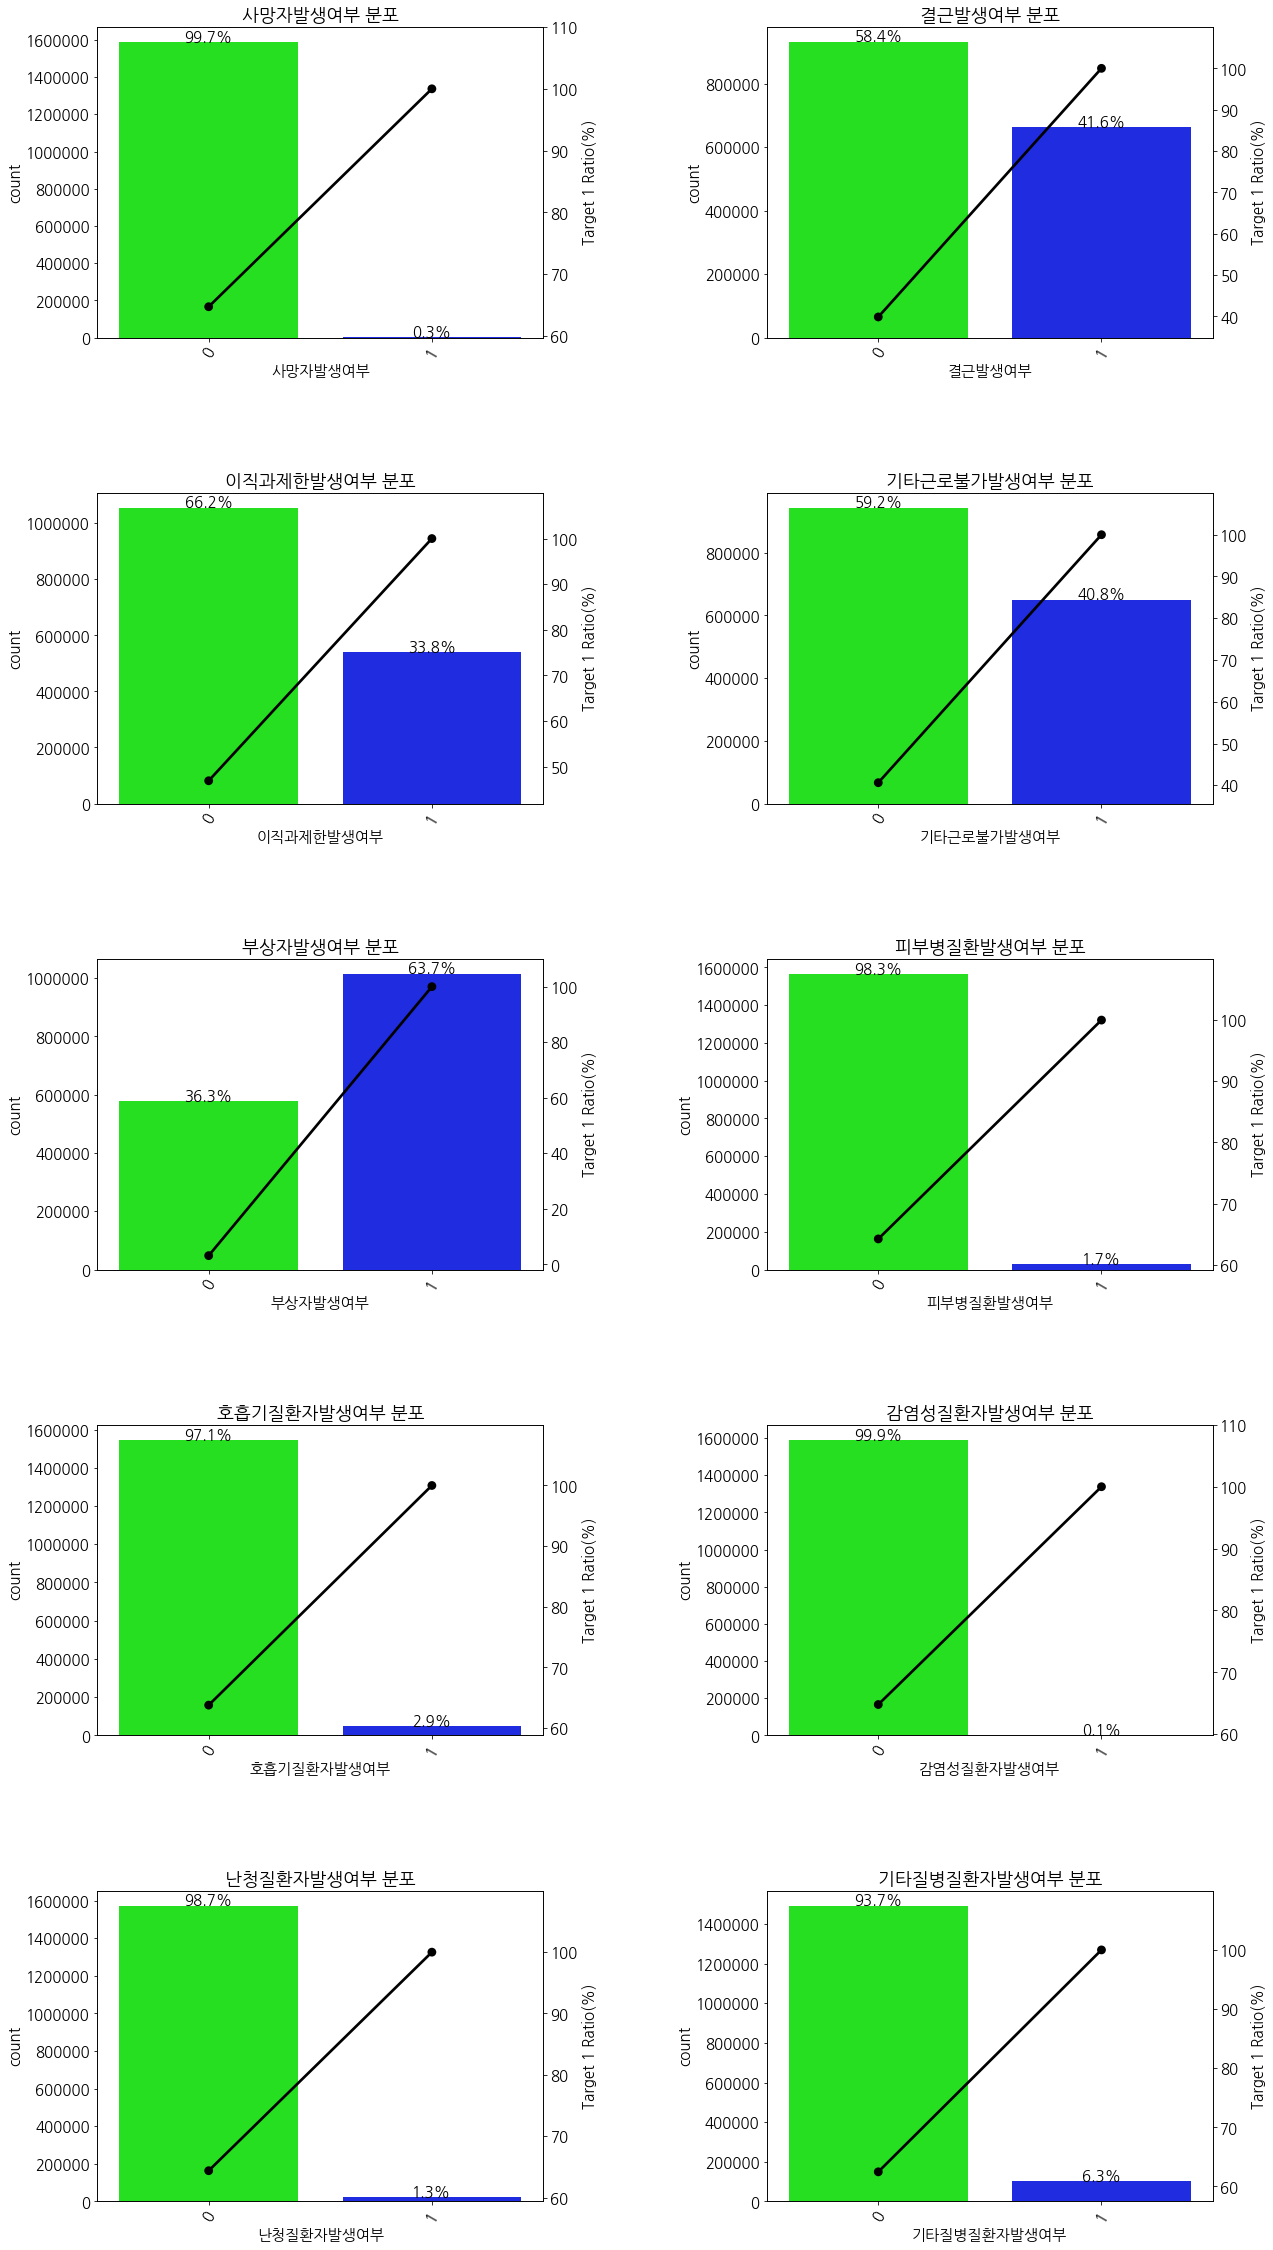

In [48]:
# 발생여부에 관한 특성은 에측하고자 하는 값(Target)과 관련이 높아 학습 데이터가 예측 시 못 쓰는 특성을 반영하는 정보의 누수 문제가 발생하기 때문에, 해당 특성들은 사용하지 않기로 함.

plot_cat_dist_with_true_ratio(df_clean, ['사망자발생여부', '결근발생여부', '이직과제한발생여부', '기타근로불가발생여부', '부상자발생여부', '피부병질환발생여부', '호흡기질환자발생여부', '감염성질환자발생여부', '난청질환자발생여부', '기타질병질환자발생여부'], 
                              num_rows=5, num_cols=2, size=(20, 40))

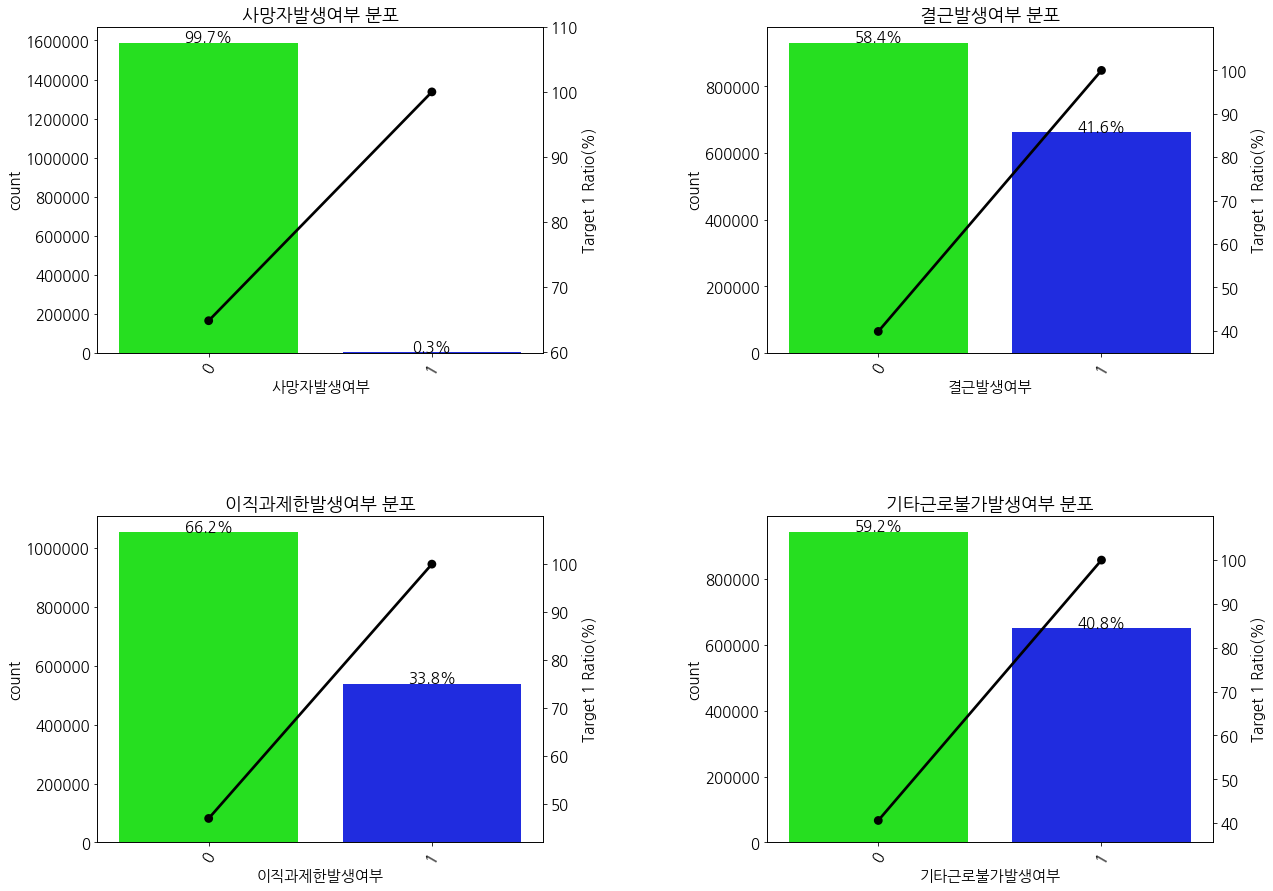

In [49]:
plot_cat_dist_with_true_ratio(df_clean, ['사망자발생여부', '결근발생여부', '이직과제한발생여부', '기타근로불가발생여부'], 
                              num_rows=2, num_cols=2, size=(20, 15))

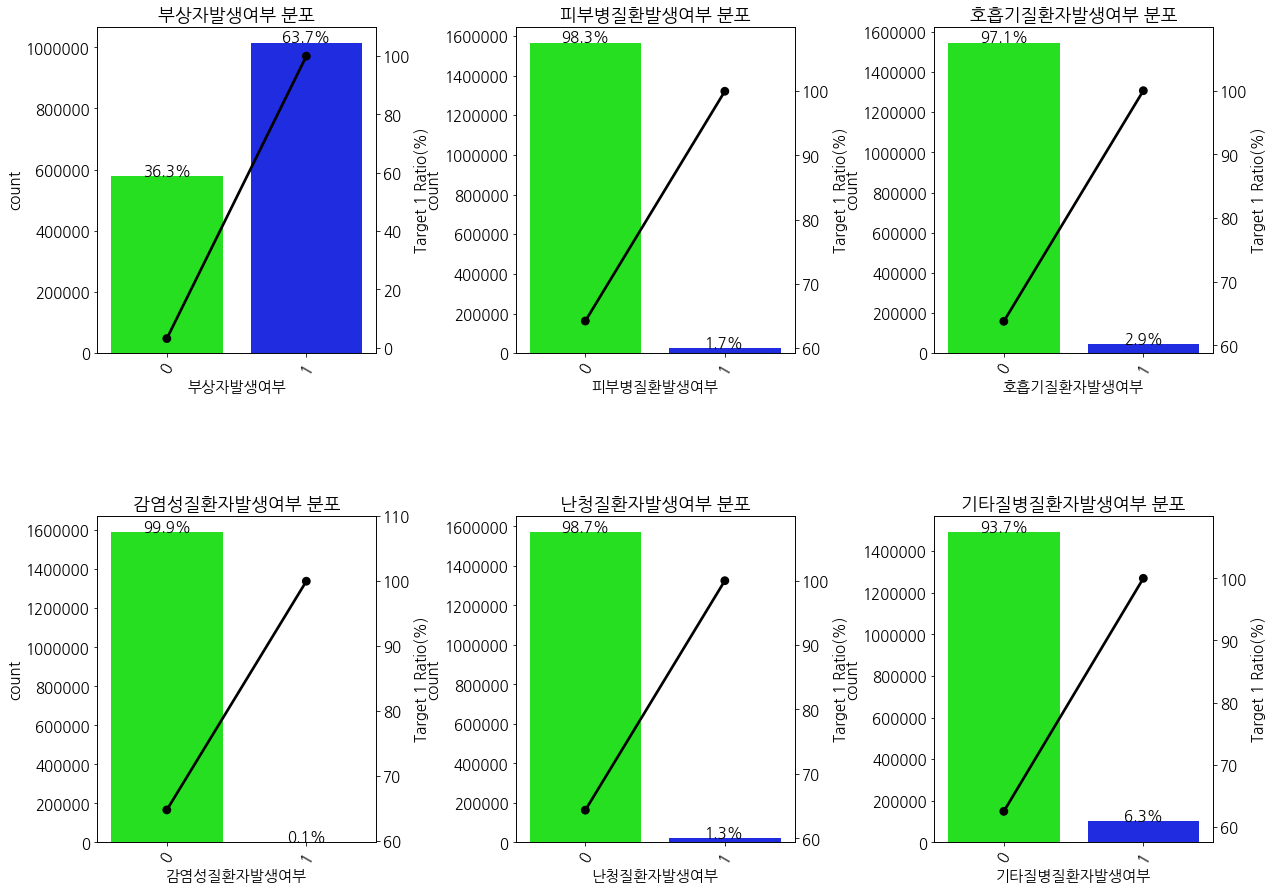

In [50]:
plot_cat_dist_with_true_ratio(df_clean, ['부상자발생여부', '피부병질환발생여부', '호흡기질환자발생여부', '감염성질환자발생여부', '난청질환자발생여부', '기타질병질환자발생여부'], 
                              num_rows=2, num_cols=3, size=(20, 15))

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# 모델을 만들기 전 데이터셋 나누기 (train, val, test)
# hold-out 검증 방법 사용
# Target 비율을 일정하게 유지하기 위해 stratify=df[target] 사용
# 타겟은 no_injuries_illnesses, Feature는 운영기관, 기업규모, 년도, 산업, 직원근로시간구간으로 설정

target = '산재발생여부'
features = ['Institution', 'Average employees', 'Year', 'Industry', 'Employee working hours']

train, test = train_test_split(df_clean, test_size = 0.2, stratify=df_clean[target], random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify=train[target], random_state = 42)

X_train, y_train = train[features], train[target]
X_val, y_val = val[features], val[target]
X_test, y_test = test[features], test[target]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1020225, 5), (255057, 5), (318821, 5), (1020225,), (255057,), (318821,))

In [52]:
# 기준모델 생성 (Validation)
# 기준모델의 정확도(Accuracy Score와 presion, F1 score를 출력)

base = y_val.mode()[0]
baseline = len(y_val) * [base]

accuracyBASE = accuracy_score(y_val, baseline).round(4)
recallBASE = recall_score(y_val, baseline).round(4)
precisionBASE = precision_score(y_val, baseline).round(4)
f1BASE = f1_score(y_val, baseline).round(4)
rasBASE = roc_auc_score(y_val, baseline).round(4)

In [53]:
print("Val accuracy(BASE): ", accuracyBASE)
print("Val recall(BASE):", recallBASE)
print("Val precision(BASE):", precisionBASE)
print("Val f1(BASE):", f1BASE)
print("Val AUC SCORE(BASE):", rasBASE)

Val accuracy(BASE):  0.6485
Val recall(BASE): 1.0
Val precision(BASE): 0.6485
Val f1(BASE): 0.7868
Val AUC SCORE(BASE): 0.5


In [54]:
encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [55]:
# XGBClassifier + RandomizedSearchCV 모델 구현

import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.distributions import uniform
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

pp1 = make_pipeline(
    SimpleImputer(),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        random_state = 42,
        n_jobs = -1,
        use_label_encoder = False,
    ),
)

ps1 = {
    "simpleimputer__strategy": ["median", "mean"],
    "xgbclassifier__learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "xgbclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "xgbclassifier__min_child_weight": [1, 2, 3, 4, 5],
    "xgbclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "xgbclassifier__colsample_bytree": uniform(
        loc = 0.5, scale = 0.5
    ),  
}

def fit_trees(X_train_encoded, y_train):

    pipe = None    
    clf = None     
    params = None

    pipe = pp1
    params = ps1
  
    clf = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf.fit(X_train_encoded, y_train)

    return clf

In [56]:
clf = fit_trees(X_train_encoded, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [57]:
print("Best CV roc_auc score", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV roc_auc score 0.8206994562644127
Best CV params {'simpleimputer__strategy': 'median', 'xgbclassifier__colsample_bytree': 0.8982714934301164, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 70}


In [58]:
def calculate_score(pipe, X, y):
    val_accuracy_xg = accuracy_score(y, pipe.predict(X)).round(4)
    val_recall_xg = recall_score(y, pipe.predict(X)).round(4)
    val_precision_xg = precision_score(y, pipe.predict(X)).round(4)
    val_f1_xg = f1_score(y, pipe.predict(X)).round(4)

    pred_proba = pipe.predict_proba(X)[:, 1]
    val_auc_score_xg = roc_auc_score(y, pred_proba).round(4)

    return val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg

In [59]:
val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg = calculate_score(clf.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(XGB-RAN): ", val_accuracy_xg)
print("Val recall(XGB-RAN): ", val_recall_xg)
print("Val precision(XGB-RAN):", val_precision_xg)
print("Val f1(XGB-RAN):", val_f1_xg)
print("Val auc score(XGB-RAN): ", val_auc_score_xg)

Val accuracy(XGB-RAN):  0.7597
Val recall(XGB-RAN):  0.8661
Val precision(XGB-RAN): 0.7854
Val f1(XGB-RAN): 0.8238
Val auc score(XGB-RAN):  0.822


In [60]:
# 로지스틱 모델(CV) 구현

from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV

ohe = OneHotEncoder(use_cat_names=True)

X_train_ohe = ohe.fit_transform(X_train)
X_val_ohe = ohe.transform(X_val)
X_test_ohe = ohe.transform(X_test)

Cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]

model = LogisticRegressionCV(Cs=Cs)
model.fit(X_train_ohe, y_train)

y_val_pred = model.predict(X_val_ohe)

In [61]:
val_accuracy_lc = accuracy_score(y_val_pred, y_val).round(4)
val_recall_lc = recall_score(y_val_pred, y_val).round(4)
val_precision_lc = precision_score(y_val_pred, y_val).round(4)
val_f1_lc = f1_score(y_val_pred, y_val).round(4)

pred_proba_lc = model.predict_proba(X_val_ohe)[:, 1]
val_auc_lc = roc_auc_score(y_val, pred_proba_lc).round(4)

print("Best Cs : ",  model.C_)
print("Val accuracy(LCV): ", val_accuracy_lc)
print("Val recall(LCV): ", val_recall_lc)
print("Val precision(LCV):", val_precision_lc)
print("Val f1(LCV):", val_f1_lc)
print("Val auc score(LCV): ", val_auc_lc)

Best Cs :  [0.05]
Val accuracy(LCV):  0.7545
Val recall(LCV):  0.775
Val precision(LCV): 0.8755
Val f1(LCV): 0.8222
Val auc score(LCV):  0.8128


In [62]:
# RandomForestClassifier + RandomizedSearchCV 모델 구현

pp2 = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)

ps2 = {
    "simpleimputer__strategy": ["median", "mean"],
    "randomforestclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "randomforestclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "randomforestclassifier__max_samples" : [0.2, 0.4, 0.6, 0.8, 1.0],
    "randomforestclassifier__max_features" : [0.2, 0.4, 0.6, 0.8, 1.0]
}

def fit_trees1(X_train_encoded, y_train):

    pipe1 = None    
    clf1 = None     
    params1 = None

    pipe1 = pp2
    params1 = ps2
  
    clf1 = RandomizedSearchCV(
    pipe1,
    param_distributions=params1,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf1.fit(X_train_encoded, y_train)

    return clf1

In [63]:
clf1 = fit_trees1(X_train_encoded, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [64]:
print("Best CV roc_auc score", clf1.best_score_)
print("Best CV params", clf1.best_params_)

Best CV roc_auc score 0.8151747147935323
Best CV params {'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_samples': 0.8, 'randomforestclassifier__max_features': 0.4, 'randomforestclassifier__max_depth': 9}


In [65]:
val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf = calculate_score(clf1.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(rf-RAN): ", val_accuracy_rf)
print("Val recall(rf-RAN): ", val_recall_rf)
print("Val precision(rf-RAN):", val_precision_rf)
print("Val f1(rf-RAN):", val_f1_rf)
print("Val auc score(rf-RAN): ", val_auc_score_rf)

Val accuracy(rf-RAN):  0.7553
Val recall(rf-RAN):  0.8621
Val precision(rf-RAN): 0.7827
Val f1(rf-RAN): 0.8205
Val auc score(rf-RAN):  0.8163


In [66]:
Base = [accuracyBASE, recallBASE, precisionBASE, f1BASE, rasBASE]
XGB = [val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg]
LCV = [val_accuracy_lc, val_recall_lc, val_precision_lc, val_f1_lc, val_auc_lc]
RF = [val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf]

In [67]:
evaluation = pd.DataFrame(zip(Base, XGB, LCV, RF))
evaluation = evaluation.rename(columns = {0:'Base', 1:'XGB', 2:'LCV', 3:'RF'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})

In [68]:
evaluation

,Base,XGB,LCV,RF
accuracy,0.6485,0.7597,0.7545,0.7553
recall,1.0000,0.8661,0.7750,0.8621
precision,0.6485,0.7854,0.8755,0.7827
f1,0.7868,0.8238,0.8222,0.8205
ROC-AUC,0.5000,0.8220,0.8128,0.8163


In [69]:
# XGB - Test(일반화) 성능 확인

accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test = calculate_score(clf.best_estimator_, X_test_encoded, y_test)
XGB_test = [accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test]
test_evaluation = pd.DataFrame(zip(XGB_test))
test_evaluation = test_evaluation.rename(columns = {0:'Test-XGB'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})
test_evaluation

,Test-XGB
accuracy,0.7591
recall,0.8670
precision,0.7843
f1,0.8236
ROC-AUC,0.8213


In [70]:
pipeline = clf.best_estimator_

preprocess_pipeline = None
model = None

model = pipeline[1]  
preprocess_pipeline = pipeline

X_test_preprocessed = None

X_test_preprocessed = preprocess_pipeline[0].transform(X_test_encoded)

In [71]:
# 순열 중요도 계산

import eli5
from eli5.sklearn import PermutationImportance

def get_permutation_importance(X, y, model):
    permuter = None
 
    permuter = PermutationImportance(
    model,  
    scoring="roc_auc",
    n_iter=5,  
    random_state=42,
    )
    
    permuter.fit(X, y)

    return permuter

In [72]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)

print("Important Features : ")
p_i = sorted(
    list(zip(X_test_encoded.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i[:5])

Important Features : 
[('Average employees', 0.2540553010643408), ('Industry', 0.042178161435611886), ('Employee working hours', 0.02811692319004413), ('Year', 0.0074404596790948576), ('Institution', 0.005472133546043212)]


In [73]:
eli5.show_weights(permuter, top=None, feature_names = X_test_encoded.columns.tolist())

Weight,Feature
0.2541 ± 0.0020,Average employees
0.0422 ± 0.0006,Industry
0.0281 ± 0.0004,Employee working hours
0.0074 ± 0.0002,Year
0.0055 ± 0.0001,Institution


In [74]:
# 특성별 PDP 플롯 확인

from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact_plot, pdp_interact

def get_pdp_isolated(dataset, model, feature):
    pdp_isolated = None

    pdp_isolated = pdp_isolate(
    model,
    dataset,
    model_features = dataset.columns,
    feature = feature,
    grid_type = "percentile",  
    num_grid_points = 10,
    )

    return pdp_isolated

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5711e9c670>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5711e9cd00>})

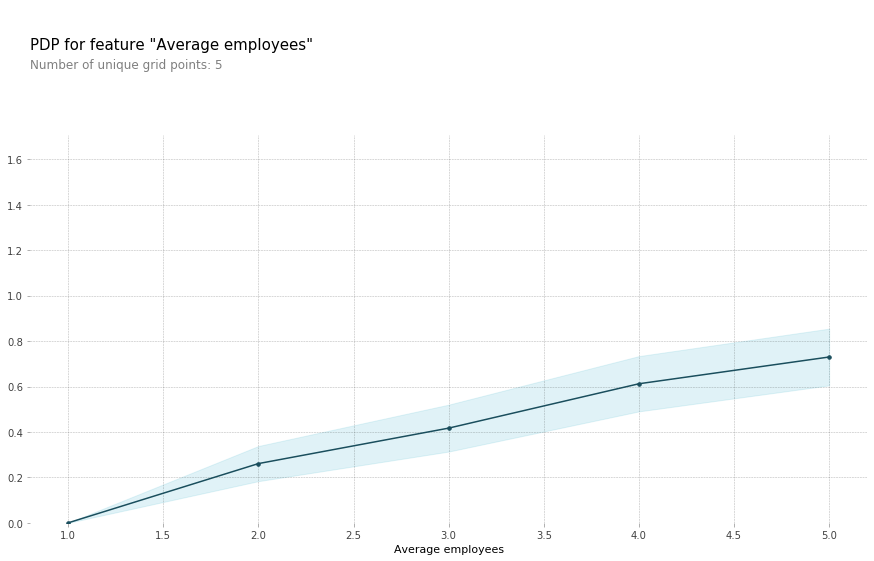

In [75]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
feature1 = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature1)
pdp_plot(pdp_isolated, feature_name=feature1)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5711e4b9d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f571148a4c0>})

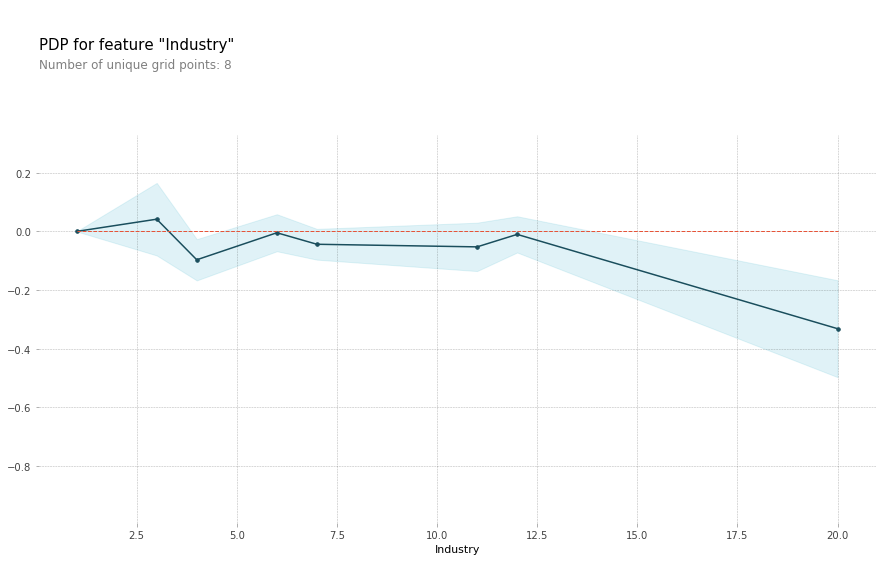

In [76]:
feature2 = sorted(p_i, key = lambda x: x[1], reverse = True)[1][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature2)
pdp_plot(pdp_isolated, feature_name=feature2)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5713809b80>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f57114622b0>})

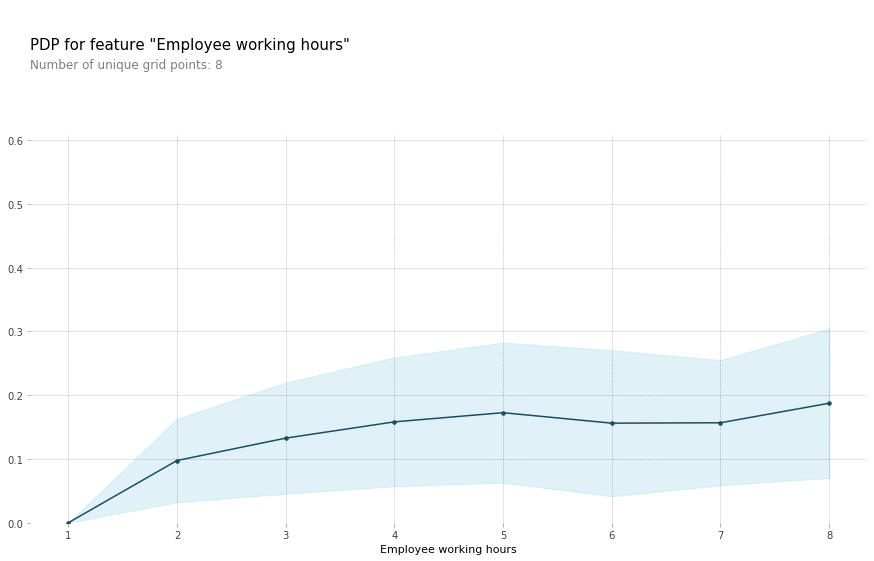

In [77]:
feature3 = sorted(p_i, key=lambda x: x[1], reverse=True)[2][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature3)
pdp_plot(pdp_isolated, feature_name=feature3)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f57113df040>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f57113dba30>})

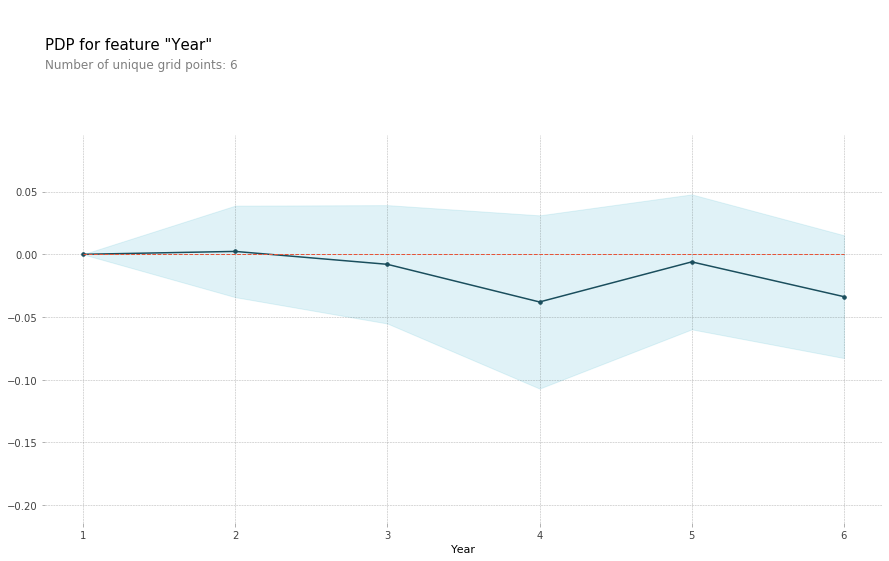

In [78]:
feature4 = sorted(p_i, key=lambda x: x[1], reverse=True)[3][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature4)
pdp_plot(pdp_isolated, feature_name=feature4)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5711e37670>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f57113b9160>})

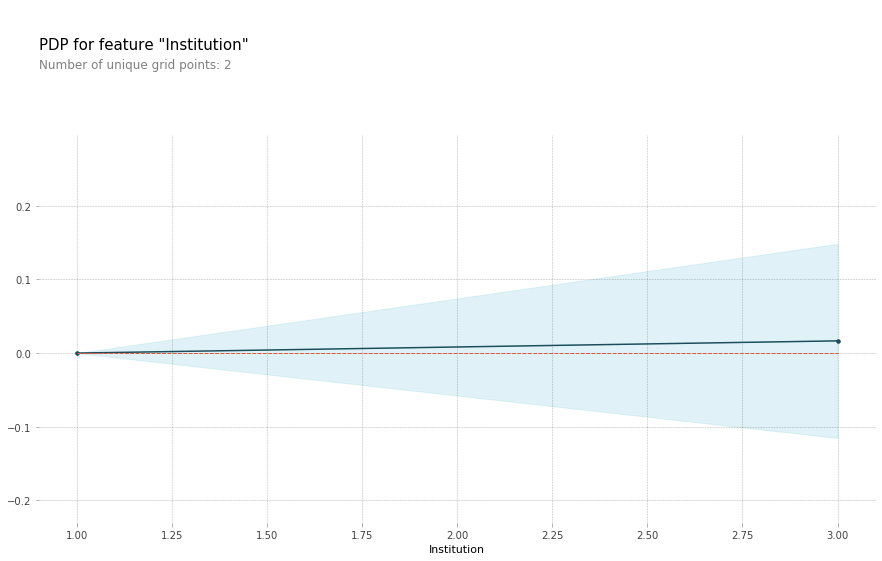

In [79]:
feature5 = sorted(p_i, key=lambda x: x[1], reverse=True)[4][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature5)
pdp_plot(pdp_isolated, feature_name=feature5)

In [80]:
mappings = encoder.mapping
print(mappings)

[{'col': 'Institution', 'mapping': Not a government entity    1
Local Government entity    2
State Government entity    3
NaN                       -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Average employees', 'mapping': 1 ~ 10 employees      1
10 ~ 25 employees     2
25 ~ 50 employees     3
50 ~ 150 employees    4
150 employees ~       5
NaN                  -2
dtype: int64, 'data_type': CategoricalDtype(categories=['1 ~ 10 employees', '10 ~ 25 employees', '25 ~ 50 employees',
                  '50 ~ 150 employees', '150 employees ~ '],
, ordered=True)}, {'col': 'Year', 'mapping': 2018.0    1
2017.0    2
2019.0    3
2021.0    4
2016.0    5
2020.0    6
NaN      -2
dtype: int64, 'data_type': dtype('O')}, {'col': 'Industry', 'mapping': AFFH           1
WT             2
TW             3
CS             4
MCE            5
RT             6
MF             7
RE, RL         8
OS(NOT PA)     9
ASWMRS        10
AFS           11
HCSA          12
UT            13
MQOG          14
PA      

In [81]:
mapping_data1 = list(filter(lambda x: x["col"] == feature1, mappings))
mapping_data2 = list(filter(lambda x: x["col"] == feature2, mappings))
mapping_data3 = list(filter(lambda x: x["col"] == feature3, mappings))
mapping_data4 = list(filter(lambda x: x["col"] == feature4, mappings))
mapping_data5 = list(filter(lambda x: x["col"] == feature5, mappings))
print(mapping_data1)
print(mapping_data2)
print(mapping_data3)
print(mapping_data4)
print(mapping_data5)

[{'col': 'Average employees', 'mapping': 1 ~ 10 employees      1
10 ~ 25 employees     2
25 ~ 50 employees     3
50 ~ 150 employees    4
150 employees ~       5
NaN                  -2
dtype: int64, 'data_type': CategoricalDtype(categories=['1 ~ 10 employees', '10 ~ 25 employees', '25 ~ 50 employees',
                  '50 ~ 150 employees', '150 employees ~ '],
, ordered=True)}]
[{'col': 'Industry', 'mapping': AFFH           1
WT             2
TW             3
CS             4
MCE            5
RT             6
MF             7
RE, RL         8
OS(NOT PA)     9
ASWMRS        10
AFS           11
HCSA          12
UT            13
MQOG          14
PA            15
IF            16
PST           17
ES            18
AER           19
FI            20
NaN           -2
dtype: int64, 'data_type': dtype('O')}]
[{'col': 'Employee working hours', 'mapping': 1 ~ 1000 hr       1
1000 ~ 1200 hr    2
1200 ~ 1400 hr    3
1400~ 1600 hr     4
1600 ~ 1800 hr    5
1800 ~ 2000 hr    6
2000 ~ 2400 hr    7
240

In [82]:
maps1 = mapping_data1[0]["mapping"]
maps2 = mapping_data2[0]["mapping"]
maps3 = mapping_data3[0]["mapping"]
maps4 = mapping_data4[0]["mapping"]
maps5 = mapping_data5[0]["mapping"]

encoded_features1 = maps1.values.tolist()
original_features1 = maps1.index.tolist()
encoded_features2 = maps2.values.tolist()
original_features2 = maps2.index.tolist()
encoded_features3 = maps3.values.tolist()
original_features3 = maps3.index.tolist()
encoded_features4 = maps4.values.tolist()
original_features4 = maps4.index.tolist()
encoded_features5 = maps5.values.tolist()
original_features5 = maps5.index.tolist()

In [83]:
target_feature1 = 'Average employees'
target_feature2 = 'Industry'
target_feature3 = 'Employee working hours'
target_feature4 = 'Year'
target_feature5 = 'Institution'

([<matplotlib.axis.XTick at 0x7f57112c6d60>,
 <a list of 6 Text xticklabel objects>)

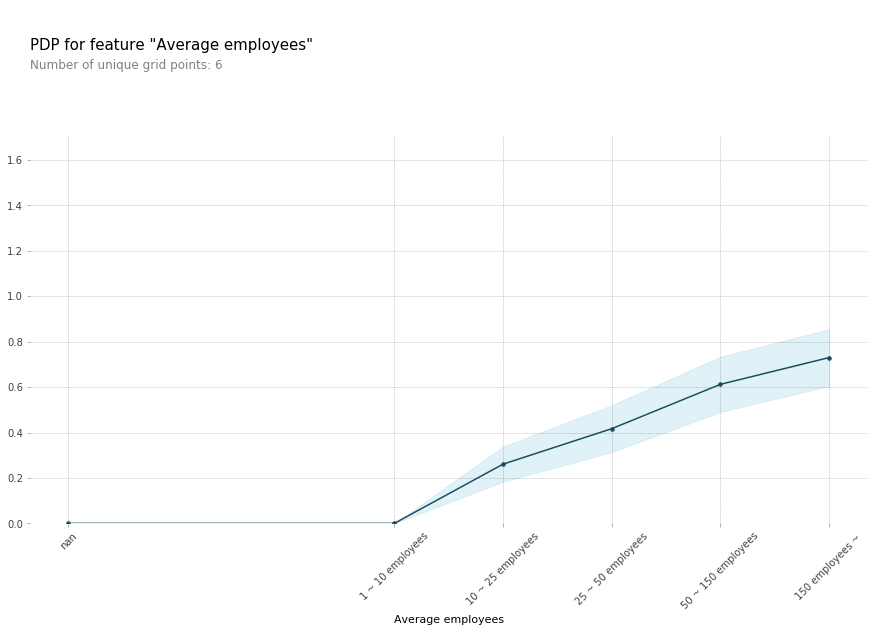

In [84]:
pdp_dist1 = pdp_isolate(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature=target_feature1,
    cust_grid_points=[-2, 1, 2, 3, 4, 5]
)
pdp_plot(pdp_dist1, feature_name=feature1)
plt.xticks(encoded_features1, original_features1, rotation=45)

([<matplotlib.axis.XTick at 0x7f5711dede80>,
 <a list of 21 Text xticklabel objects>)

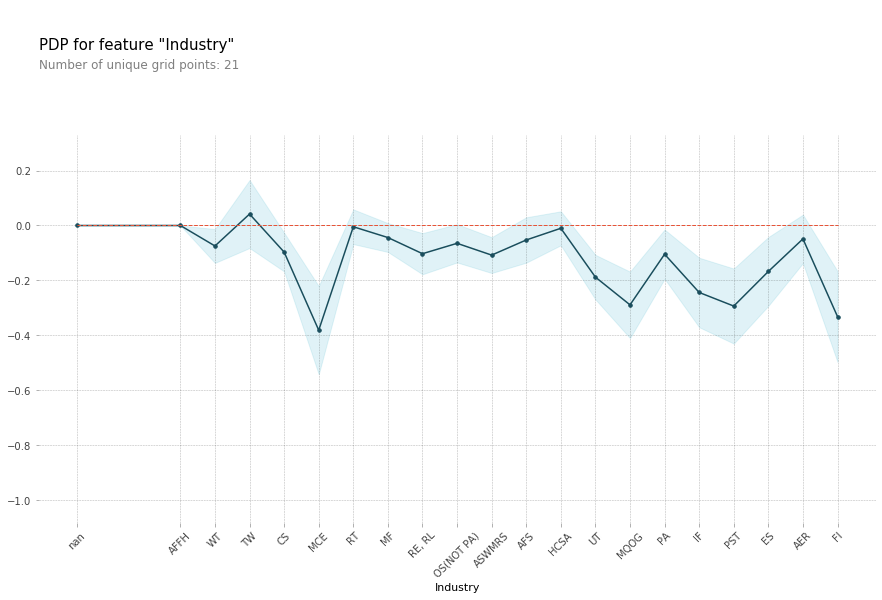

In [85]:
pdp_dist2 = pdp_isolate(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature=target_feature2,
    cust_grid_points=[-2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
)
pdp_plot(pdp_dist2, feature_name=feature2)
plt.xticks(encoded_features2, original_features2, rotation=45)

([<matplotlib.axis.XTick at 0x7f571120bb80>,
 <a list of 9 Text xticklabel objects>)

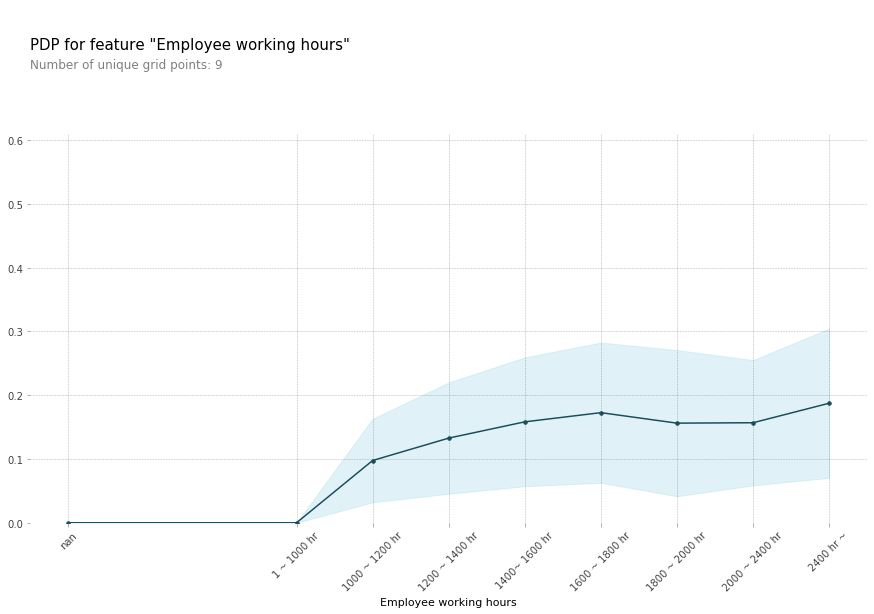

In [86]:
pdp_dist3 = pdp_isolate(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature=target_feature3,
    cust_grid_points=[-2, 1, 2, 3, 4, 5, 6, 7, 8]
)
pdp_plot(pdp_dist3, feature_name=feature3)
plt.xticks(encoded_features3, original_features3, rotation=45)

([<matplotlib.axis.XTick at 0x7f5711da9a00>,
 <a list of 7 Text xticklabel objects>)

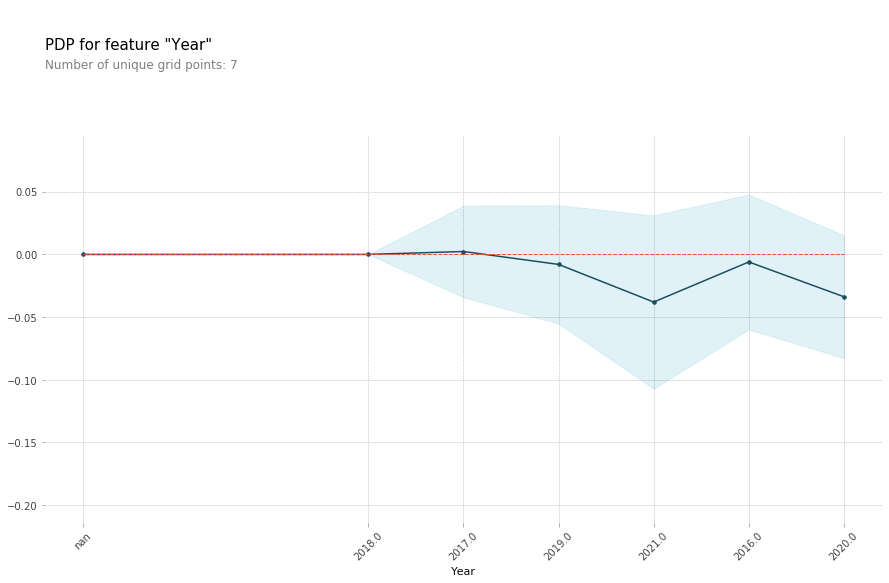

In [87]:
pdp_dist4 = pdp_isolate(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature=target_feature4,
    cust_grid_points=[-2, 1, 2, 3, 4, 5, 6]
)
pdp_plot(pdp_dist4, feature_name=feature4)
plt.xticks(encoded_features4, original_features4, rotation=45)

([<matplotlib.axis.XTick at 0x7f57111e9c40>,
 <a list of 4 Text xticklabel objects>)

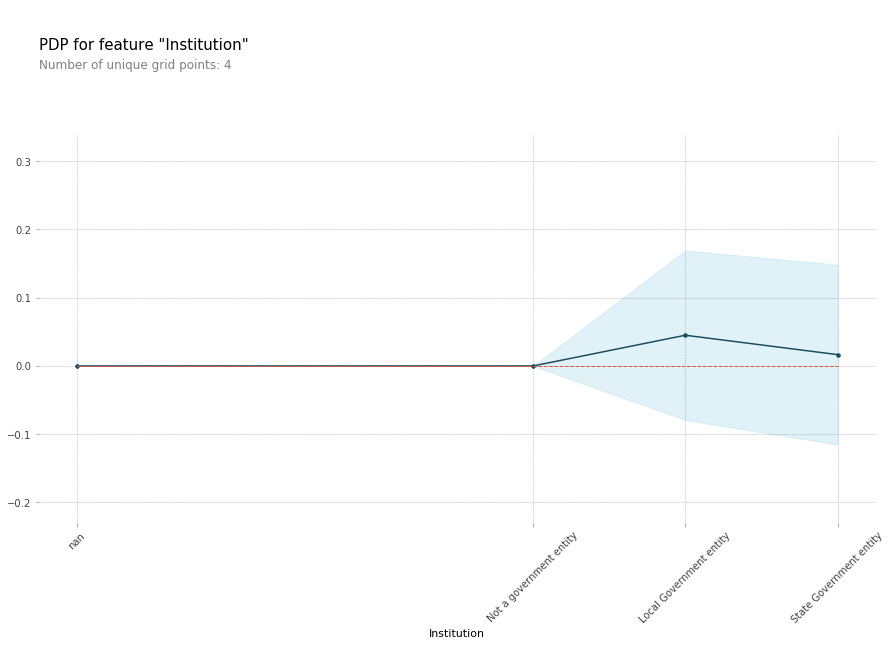

In [88]:
pdp_dist5 = pdp_isolate(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    feature=target_feature5,
    cust_grid_points=[-2, 1, 2, 3]
)
pdp_plot(pdp_dist5, feature_name=feature5)
plt.xticks(encoded_features5, original_features5, rotation=45)

In [89]:
# 2가지 특성으로 조사

target_features1 = ["Average employees", "Industry"]
target_features2 = ["Employee working hours", "Industry"]
target_features3 = ["Average employees", "Employee working hours"]

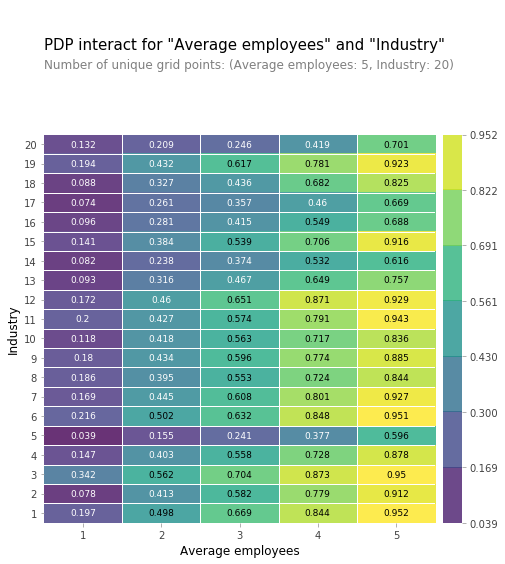

In [90]:
interaction1 = pdp_interact(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    features = target_features1,
    cust_grid_points=[
        None,
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    ]
)

axes1 = pdp_interact_plot(interaction1, plot_type="grid", feature_names=target_features1)

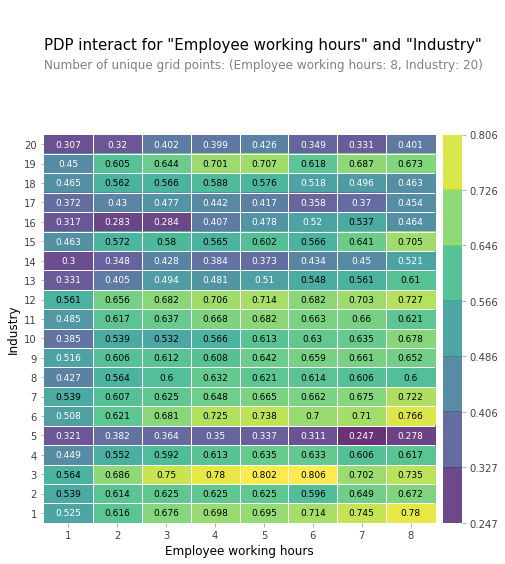

In [91]:
interaction2 = pdp_interact(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    features = target_features2,
    cust_grid_points=[
        [1, 2, 3, 4, 5, 6, 7, 8],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    ]
)

axes2 = pdp_interact_plot(interaction2, plot_type="grid", feature_names=target_features2)

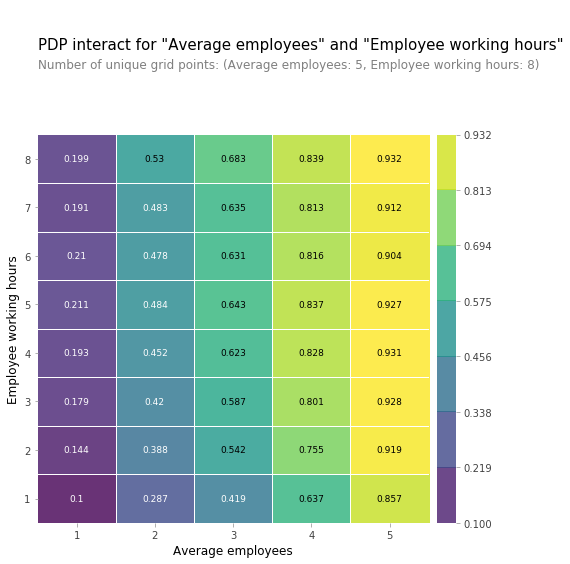

In [92]:
interaction3 = pdp_interact(
    model = model,
    dataset = X_test_preprocessed_df,
    model_features = X_test_preprocessed_df.columns,
    features = target_features3,
    cust_grid_points=[
        None,
        [1, 2, 3, 4, 5, 6, 7, 8]
    ]
)

axes3 = pdp_interact_plot(interaction3, plot_type="grid", feature_names=target_features3)